In [1]:
import pyspark
import pandas as pd
from datetime import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
from pyspark.sql.functions import to_date,date_format,col
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains

In [2]:
#variables
base_path = "/home/yamukelani/source_code/msc_research/rul_prediction/src/datasets/"

In [3]:
spark = SparkSession.builder\
          .appName("Feature engineering")\
          .getOrCreate()
        
battery_charging_df = spark.read.option("header",True) \
     .csv(base_path+"battery_charging_data.csv")

In [4]:

battery_discharging_df = spark.read.option("header",True) \
     .csv(base_path+"battery_discharging_data.csv")

In [5]:
b_charge = battery_charging_df.toPandas()

In [10]:
required_columns = ['test_time','time','ambient_temperature','current_measured',"temperature_measured","voltage_measured","voltage_charge","current_charge"]
battery_charging_df.select(*required_columns).show()

+--------------------+------+-------------------+--------------------+--------------------+----------------+--------------+--------------+
|           test_time|  time|ambient_temperature|    current_measured|temperature_measured|voltage_measured|voltage_charge|current_charge|
+--------------------+------+-------------------+--------------------+--------------------+----------------+--------------+--------------+
|13-Feb-2009 19:35:35|     0|                 24|-0.00026629056704...|    26.7374941820803| 3.2861554871302|         0.002|       -0.0006|
|13-Feb-2009 19:35:35| 2.516|                 24|   -2.25803060435941|    26.7376491312797|2.91926678611011|         1.828|       -2.2691|
|13-Feb-2009 19:35:35| 5.204|                 24|    1.49031592003357|    26.7483117929325|3.49991912016096|         4.238|        1.4995|
|13-Feb-2009 19:35:35| 7.672|                 24|    1.49273457212754|    26.7741004003214|3.51857863386994|         4.263|        1.4995|
|13-Feb-2009 19:35:35|10.14

In [11]:
from pyspark.sql.functions import col
battery_charging_df.select(battery_charging_df.test_time).distinct().orderBy(col("test_time")).show()

+--------------------+
|           test_time|
+--------------------+
|02-Mar-2009 18:52:27|
|03-Mar-2009 00:07:20|
|03-Mar-2009 04:47:03|
|03-Mar-2009 09:26:17|
|03-Mar-2009 14:05:44|
|03-Mar-2009 19:21:23|
|05-Mar-2009 15:57:39|
|05-Mar-2009 20:27:37|
|06-Mar-2009 01:06:35|
|06-Mar-2009 05:46:35|
|06-Mar-2009 10:25:28|
|06-Mar-2009 15:42:28|
|13-Feb-2009 19:35:35|
|14-Feb-2009 01:02:23|
|14-Feb-2009 05:53:30|
|14-Feb-2009 10:44:11|
|14-Feb-2009 15:34:35|
|14-Feb-2009 21:00:31|
|18-Feb-2009 13:12:53|
|18-Feb-2009 18:38:22|
+--------------------+
only showing top 20 rows



In [12]:
battery_charging_df['time']

Column<'time'>

In [13]:
b_charge['time'] = pd.Timestamp(b_charge['time'], unit='s')

TypeError: Cannot convert input [0               0
1           2.516
2           5.204
3           7.672
4          10.141
           ...   
87777    2049.141
87778    2052.313
87779    2056.375
87780    2060.454
87781    2062.547
Name: time, Length: 87782, dtype: object] of type <class 'pandas.core.series.Series'> to Timestamp

In [14]:
battery_discharging_df.toPandas()

,type,ambient_temperature,test_time,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,capacity
0,discharge,24,13-Feb-2009 23:12:28,4.20194298136526,-0.00171690642508153,26.2885473135159,0.0002,0,0,1.82330777421494
1,discharge,24,13-Feb-2009 23:12:28,4.20169558339226,0.00047797678855164,26.28175128337,0.0002,4.217,9.36,1.82330777421494
2,discharge,24,13-Feb-2009 23:12:28,3.63107459842952,-3.97283053019431,26.4411164601955,3.997,1.698,19.547,1.82330777421494
3,discharge,24,13-Feb-2009 23:12:28,4.17041792828356,-0.00127494941149688,26.8634478009843,0.0008,4.182,29.5,1.82330777421494
4,discharge,24,13-Feb-2009 23:12:28,3.60184404003251,-3.97251826598728,27.0841952506812,3.997,1.688,39.469,1.82330777421494
...,...,...,...,...,...,...,...,...,...,...
16333,discharge,24,19-Mar-2009 10:34:54,3.29002585623131,0.000939320432367856,27.2597986257042,0.0006,0.001,6151.172,1.77009262533245
16334,discharge,24,19-Mar-2009 10:34:54,3.2898151304022,-0.00266480875729883,27.2507626962015,0.0004,0,6163.094,1.77009262533245
16335,discharge,24,19-Mar-2009 10:34:54,3.29014965256407,0.00131032797906753,27.2459888014921,0.0006,0.001,6174.984,1.77009262533245
16336,discharge,24,19-Mar-2009 10:34:54,3.29004779662473,-0.00152841379586971,27.2372629205498,0.0004,0,6186.891,1.77009262533245


In [15]:
discharge_columns = ["ambient_temperature","test_time","voltage_measured","current_measured","temperature_measured","current_load","voltage_load","time","capacity"]
b_discharge = battery_discharging_df.select(*discharge_columns)

In [16]:
b_discharge = b_discharge.withColumn("date",date_format(col("test_time"),"yyyy-MM-dd").alias('ts'))
b_discharge_pd = b_discharge.toPandas()

In [17]:
rcParams['figure.figsize'] = 14, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.5)


In [18]:
b_discharge_pd['test_time'] = pd.to_datetime(b_discharge_pd['test_time'], infer_datetime_format=True)
b_discharge_pd['capacity'] = pd.to_numeric(b_discharge_pd['capacity'])
b_discharge_pd['voltage_measured'] = pd.to_numeric(b_discharge_pd['voltage_measured'])
b_discharge_pd['current_measured'] = pd.to_numeric(b_discharge_pd['current_measured'])
b_discharge_pd['temperature_measured'] = pd.to_numeric(b_discharge_pd['temperature_measured'])

In [19]:
type(b_discharge_pd['capacity'][0])

numpy.float64

In [20]:
b_discharge_pd

,ambient_temperature,test_time,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,capacity,date
0,24,2009-02-13 23:12:28,4.201943,-0.001717,26.288547,0.0002,0,0,1.823308,None
1,24,2009-02-13 23:12:28,4.201696,0.000478,26.281751,0.0002,4.217,9.36,1.823308,None
2,24,2009-02-13 23:12:28,3.631075,-3.972831,26.441116,3.997,1.698,19.547,1.823308,None
3,24,2009-02-13 23:12:28,4.170418,-0.001275,26.863448,0.0008,4.182,29.5,1.823308,None
4,24,2009-02-13 23:12:28,3.601844,-3.972518,27.084195,3.997,1.688,39.469,1.823308,None
...,...,...,...,...,...,...,...,...,...,...
16333,24,2009-03-19 10:34:54,3.290026,0.000939,27.259799,0.0006,0.001,6151.172,1.770093,None
16334,24,2009-03-19 10:34:54,3.289815,-0.002665,27.250763,0.0004,0,6163.094,1.770093,None
16335,24,2009-03-19 10:34:54,3.290150,0.001310,27.245989,0.0006,0.001,6174.984,1.770093,None
16336,24,2009-03-19 10:34:54,3.290048,-0.001528,27.237263,0.0004,0,6186.891,1.770093,None


In [22]:
b_charge_indexed = b_charge.set_index('test_time')

In [11]:
# data plot
ax = b_discharge_pd.plot(x='test_time', y='capacity');
ax.set_xlabel('Time')
ax.set_ylabel('Capacity')
ax.set_title('Capacity degradation over time')

NameError: name 'b_discharge_pd' is not defined

In [23]:
b_charge_indexed

,type,ambient_temperature,voltage_measured,current_measured,current_charge,temperature_measured,time,voltage_charge
test_time,,,,,,,,
13-Feb-2009 19:35:35,charge,24,3.2861554871302,-0.000266290567045963,-0.0006,26.7374941820803,0,0.002
13-Feb-2009 19:35:35,charge,24,2.91926678611011,-2.25803060435941,-2.2691,26.7376491312797,2.516,1.828
13-Feb-2009 19:35:35,charge,24,3.49991912016096,1.49031592003357,1.4995,26.7483117929325,5.204,4.238
13-Feb-2009 19:35:35,charge,24,3.51857863386994,1.49273457212754,1.4995,26.7741004003214,7.672,4.263
13-Feb-2009 19:35:35,charge,24,3.53141181177114,1.49112353661147,1.4995,26.8018820847318,10.141,4.288
...,...,...,...,...,...,...,...,...
19-Mar-2009 12:55:26,charge,24,4.11374575045976,1.49186489364238,1.4995,28.7257444882185,2049.141,4.884
19-Mar-2009 12:55:26,charge,24,NaN,NaN,1.4995,NaN,2052.313,4.884
19-Mar-2009 12:55:26,charge,24,4.11429489936268,1.49256268104884,1.4995,28.7411867469455,2056.375,4.884


In [27]:
sns.boxplot(data=b_charge,x='test_time', y='voltage_measured')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

Text(0.5, 1.0, 'voltage measured over time')

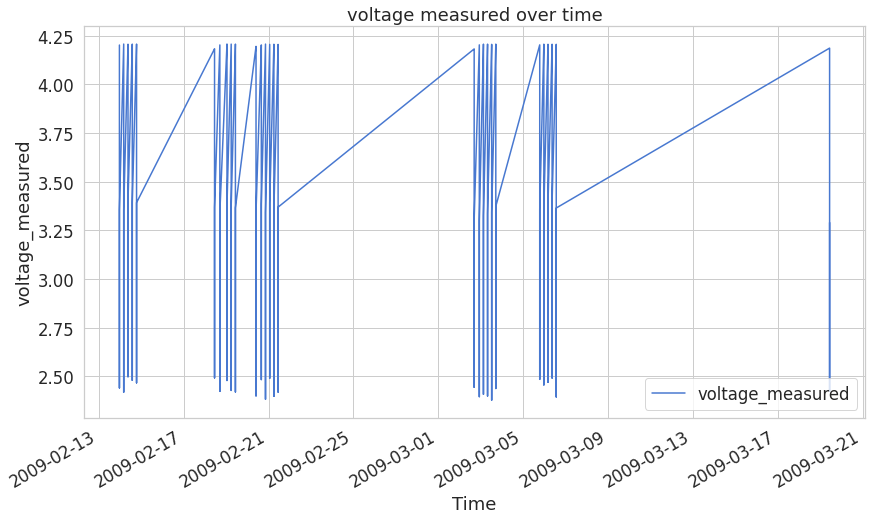

In [14]:
vx = b_discharge_pd.plot(x='test_time', y='voltage_measured');
vx.set_xlabel('Time')
vx.set_ylabel('voltage_measured')
vx.set_title('voltage measured over time')